In [ ]:
!pip install imblearn

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras import Sequential
from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense,Dropout,LSTM
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
#loading data set into pandas
data = pd.read_csv('/content/sessionr4.2_Binary (2).csv')

In [ ]:
data['insider'].value_counts()

0    469497
1      1114
Name: insider, dtype: int64

In [ ]:
data.shape

(470611, 128)

In [ ]:
data.head(5)

,starttime,endtime,user,sessionid,day,week,pc,isworkhour,isafterhour,isweekend,...,http_leakf_mean_url_len,http_leakf_mean_url_depth,http_leakf_mean_http_c_len,http_leakf_mean_http_c_nwords,http_n_hackf,http_hackf_mean_url_len,http_hackf_mean_url_depth,http_hackf_mean_http_c_len,http_hackf_mean_http_c_nwords,insider
0,1262422860,1262456340,10,0,5,0,0,0.0,0.0,0.941176,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
1,1262420940,1262434384,12,1,5,0,0,0.0,0.0,1.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
2,1262434736,1262450520,12,2,5,0,0,0.0,0.0,1.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
3,1262423340,1262456760,59,3,5,0,0,0.0,0.0,0.941176,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
4,1262422800,1262431848,95,4,5,0,0,0.0,0.0,1.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0


In [ ]:
X = data.drop(['insider'], axis=1)
Y = data['insider']

In [ ]:
X.head(5)

,starttime,endtime,user,sessionid,day,week,pc,isworkhour,isafterhour,isweekend,...,http_n_leakf,http_leakf_mean_url_len,http_leakf_mean_url_depth,http_leakf_mean_http_c_len,http_leakf_mean_http_c_nwords,http_n_hackf,http_hackf_mean_url_len,http_hackf_mean_url_depth,http_hackf_mean_http_c_len,http_hackf_mean_http_c_nwords
0,1262422860,1262456340,10,0,5,0,0,0.0,0.0,0.941176,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1262420940,1262434384,12,1,5,0,0,0.0,0.0,1.000000,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,1262434736,1262450520,12,2,5,0,0,0.0,0.0,1.000000,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,1262423340,1262456760,59,3,5,0,0,0.0,0.0,0.941176,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,1262422800,1262431848,95,4,5,0,0,0.0,0.0,1.000000,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
X_test,X_val,Y_test,Y_val = train_test_split(X_test,Y_test,test_size=0.5)

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train);

In [ ]:
print("Before SMOTE:",Counter(Y_train))
print("After SMOTE:",Counter(Y_train_smote))

Before SMOTE: Counter({0: 375604, 1: 884})
After SMOTE: Counter({0: 375604, 1: 375604})


In [ ]:
data_fi = pd.concat([X_train_smote,Y_train_smote],axis=1, join='inner')

In [ ]:
data_fi.head(5)

,starttime,endtime,user,sessionid,day,week,pc,isworkhour,isafterhour,isweekend,...,http_leakf_mean_url_len,http_leakf_mean_url_depth,http_leakf_mean_http_c_len,http_leakf_mean_http_c_nwords,http_n_hackf,http_hackf_mean_url_len,http_hackf_mean_url_depth,http_hackf_mean_http_c_len,http_hackf_mean_http_c_nwords,insider
0,1301469480,1301503440,278,6501644,457,65,0,0.984076,0.015924,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
1,1284621758,1284622446,570,3703776,262,37,2,0.500000,0.500000,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
2,1285078405,1285098180,165,3801142,267,38,0,0.621622,0.378378,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
3,1284015780,1284029651,870,3604846,255,36,0,0.846154,0.153846,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
4,1281689940,1281719400,95,3200660,228,32,0,1.000000,0.000000,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0


In [ ]:
data_fi.tail(5)

,starttime,endtime,user,sessionid,day,week,pc,isworkhour,isafterhour,isweekend,...,http_leakf_mean_url_len,http_leakf_mean_url_depth,http_leakf_mean_http_c_len,http_leakf_mean_http_c_nwords,http_n_hackf,http_hackf_mean_url_len,http_hackf_mean_url_depth,http_hackf_mean_http_c_len,http_hackf_mean_http_c_nwords,insider
751203,1297929820,1297964015,287,5901760,416,59,0,0.968348,0.031652,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1
751204,1298278914,1298322069,873,6005489,420,60,0,0.718247,0.281753,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1
751205,1282206694,1282239441,450,3303041,234,33,0,0.892872,0.107128,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1
751206,1289911709,1289923360,714,4604629,323,46,0,1.000000,0.000000,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1
751207,1290151797,1290179553,680,4604398,326,46,0,0.982787,0.017213,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1


In [ ]:
data_fi = data_fi.sample(frac=1)

In [ ]:
data_fi.head(5)

,starttime,endtime,user,sessionid,day,week,pc,isworkhour,isafterhour,isweekend,...,http_leakf_mean_url_len,http_leakf_mean_url_depth,http_leakf_mean_http_c_len,http_leakf_mean_http_c_nwords,http_n_hackf,http_hackf_mean_url_len,http_hackf_mean_url_depth,http_hackf_mean_http_c_len,http_hackf_mean_http_c_nwords,insider
546969,1295423968,1295459270,386,5502381,387,55,0,0.907096,0.092904,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1
117605,1283855467,1283857437,17,3600089,253,36,1,1.000000,0.000000,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
413650,1281345230,1281377598,508,3203397,224,32,0,0.883600,0.116400,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1
626411,1279834720,1279849115,590,2904062,206,29,0,0.000000,1.000000,0.0,...,99,3,361,45,0,0.0,0.0,0.0,0.0,1
204914,1277190180,1277227080,421,2502867,176,25,0,0.936937,0.063063,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0


In [ ]:
data_fi.tail(5)

,starttime,endtime,user,sessionid,day,week,pc,isworkhour,isafterhour,isweekend,...,http_leakf_mean_url_len,http_leakf_mean_url_depth,http_leakf_mean_http_c_len,http_leakf_mean_http_c_nwords,http_n_hackf,http_hackf_mean_url_len,http_hackf_mean_url_depth,http_hackf_mean_http_c_len,http_hackf_mean_http_c_nwords,insider
232553,1297673820,1297707060,889,5905612,413,59,0,0.846154,0.153846,0.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
289885,1297156440,1297162999,854,5805481,407,58,0,1.000000,0.000000,0.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
103745,1280062302,1280077080,777,3005391,209,30,0,0.000000,0.000000,1.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
112845,1274947800,1274980680,331,2102382,150,21,0,1.000000,0.000000,0.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
290380,1293954720,1293991500,513,5303111,370,53,0,0.000000,0.000000,0.944882,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0


In [ ]:
Y=data_fi.insider;

In [ ]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(X_val.shape,Y_val.shape)

(376488, 127) (376488,)
(47061, 127) (47061,)
(47062, 127) (47062,)


In [ ]:
input = keras.layers.Input(shape=(127))

u1 = tf.reshape(input,[-1,127,1])

u2 = Conv1D(filters=32, kernel_size=(5),activation='relu')(u1)

u3 = Conv1D(filters=64, kernel_size=(3) ,activation='relu')(u2)

u4 = Flatten()(u3)

u5 = Dropout(0.05)(u4)

out = Dense(1,activation='sigmoid')(u5)

model = keras.Model(inputs=[input],outputs=[out])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 127)]             0         
                                                                 
 tf.reshape_3 (TFOpLambda)   (None, 127, 1)            0         
                                                                 
 conv1d_6 (Conv1D)           (None, 123, 32)           192       
                                                                 
 conv1d_7 (Conv1D)           (None, 121, 64)           6208      
                                                                 
 flatten_3 (Flatten)         (None, 7744)              0         
                                                                 
 dropout_3 (Dropout)         (None, 7744)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7745

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [ ]:
history=model.fit(X_train,Y_train,epochs=10,validation_data=(X_val,Y_val))

Epoch 1/10
11766/11766 [==============================] - 67s 5ms/step - loss: 3261.6929 - accuracy: 0.9956 - val_loss: 0.0100 - val_accuracy: 0.9980
Epoch 2/10
11766/11766 [==============================] - 52s 4ms/step - loss: 62.6168 - accuracy: 0.9974 - val_loss: 0.0109 - val_accuracy: 0.9979
Epoch 3/10
11766/11766 [==============================] - 51s 4ms/step - loss: 240.9493 - accuracy: 0.9968 - val_loss: 42.0323 - val_accuracy: 0.9977
Epoch 4/10
11766/11766 [==============================] - 53s 5ms/step - loss: 4.0058 - accuracy: 0.9958 - val_loss: 0.0173 - val_accuracy: 0.9980
Epoch 5/10
11766/11766 [==============================] - 51s 4ms/step - loss: 0.7066 - accuracy: 0.9975 - val_loss: 0.0300 - val_accuracy: 0.9980
Epoch 6/10
11766/11766 [==============================] - 53s 4ms/step - loss: 54.1542 - accuracy: 0.9959 - val_loss: 9.0157 - val_accuracy: 0.9977
Epoch 7/10
11766/11766 [==============================] - 51s 4ms/step - loss: 7.7671 - accuracy: 0.9960 - val

In [ ]:
Y_predict = model.predict(X_test)

Y_predict = Y_predict.flatten()

Y_predict = np.where(Y_predict>0.5, 1,0)

1471/1471 [==============================] - 3s 2ms/step


Text(50.722222222222214, 0.5, 'Truth')

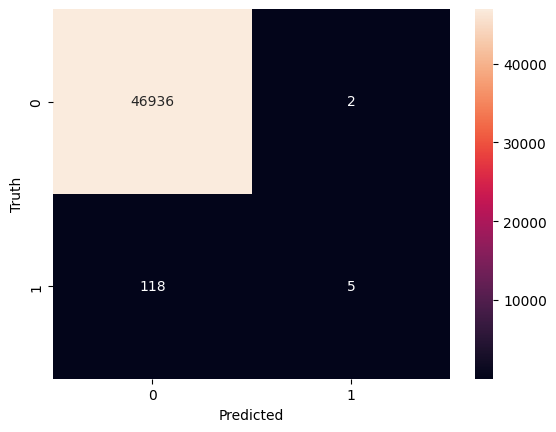

In [ ]:
cm = confusion_matrix(Y_test,Y_predict)

sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')